In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv('/CODSOFT/Titanic Survival Pred/tested.csv')
df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                         

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
df['Age'].replace(np.nan, df['Age'].mean(), inplace=True)
df['Fare'].replace(np.nan, df['Fare'].mean(), inplace=True)
df.drop('Cabin', axis=1,inplace=True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
category = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
quantity = ['Age', 'Fare']

In [17]:
df['Survived'].value_counts(normalize=True)*100

0    63.636364
1    36.363636
Name: Survived, dtype: float64

In [18]:
round(df['Survived'].value_counts(normalize=True)*100,2)

0    63.64
1    36.36
Name: Survived, dtype: float64

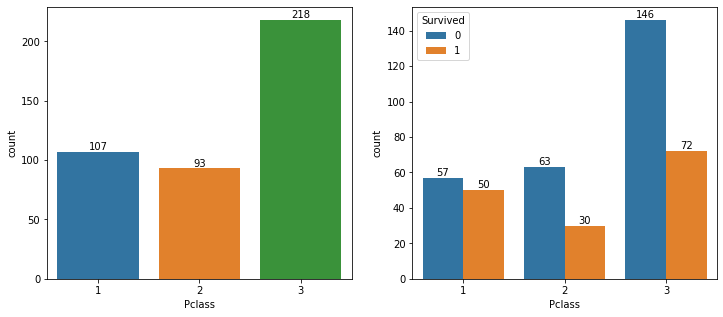

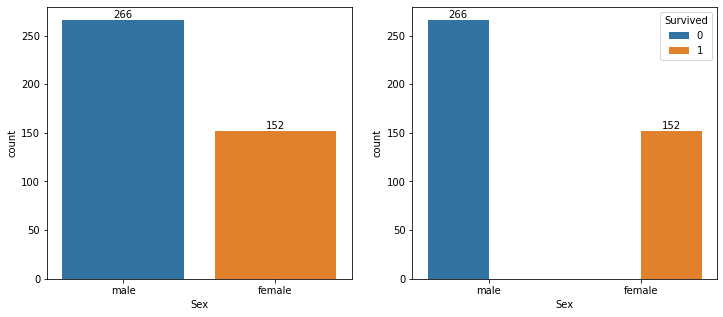

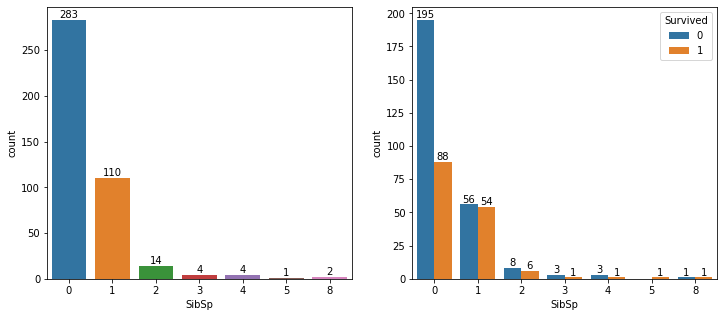

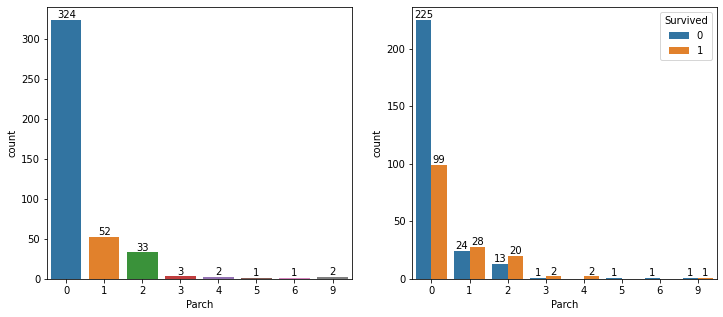

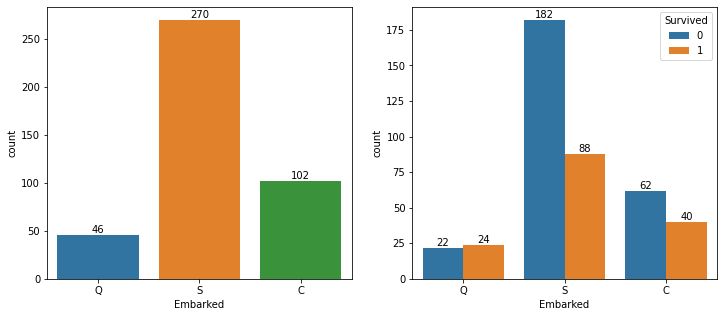

In [19]:
for column in category:   
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    ax = sb.countplot(x=column, data=df)
    ax.bar_label(ax.containers[0])

    plt.subplot(1,2,2)
    ax = sb.countplot(x=column, data=df, hue='Survived')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.show()

c:\Users\ADITY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ADITY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


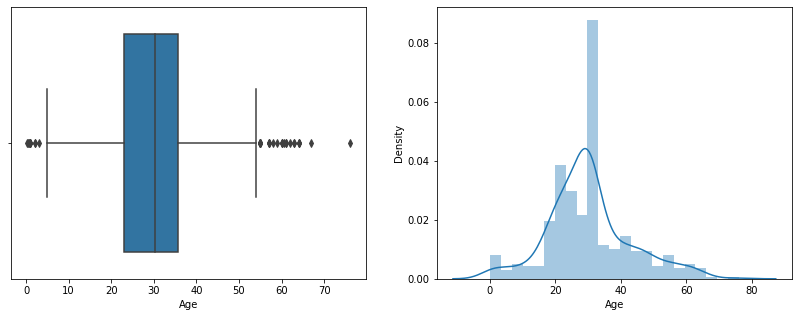

c:\Users\ADITY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ADITY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


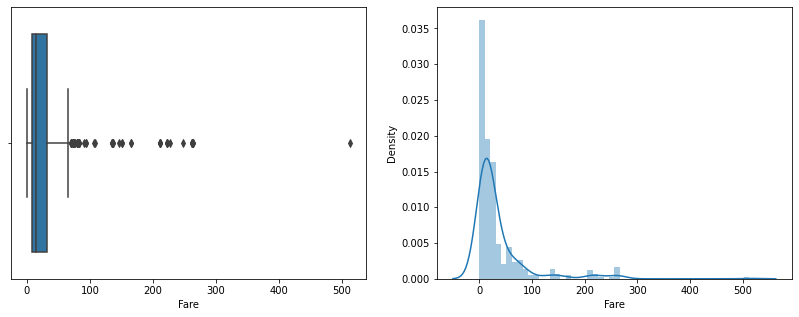

In [20]:
for column in quantity:
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    ax = sb.boxplot(df[column])

    plt.subplot(1,2,2)
    ax = sb.distplot(df[column])
    plt.show()

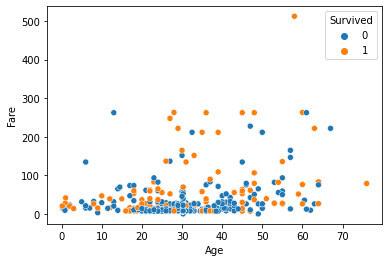

In [21]:
sb.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.show()

In [22]:
df_update = df.drop(['PassengerId','Name', 'Ticket'], axis=1)
df_update['Sex'].replace({'male':1, 'female':0}, inplace=True)
df_update['Embarked'].replace({'Q':0, 'S':1, 'C':2}, inplace=True)
df_update.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,0
1,1,3,0,47.0,1,0,7.0000,1
2,0,2,1,62.0,0,0,9.6875,0
3,0,3,1,27.0,0,0,8.6625,1
4,1,3,0,22.0,1,1,12.2875,1


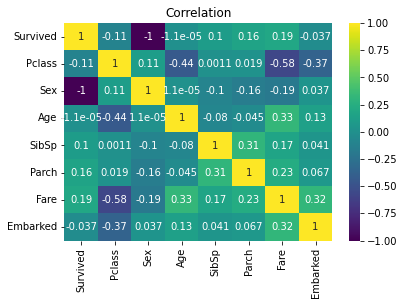

In [24]:
sb.heatmap(df_update.corr(), annot=True, cmap='viridis')
plt.title('Correlation')
plt.show()

In [25]:
# Prediction
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [26]:
X = df_update.drop('Survived', axis=1)
Y = df_update['Survived']


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=56)

In [28]:
LR = LogisticRegression(random_state=56)
LR.fit(X_train, Y_train)

c:\Users\ADITY\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=56)

In [29]:
LR.coef_

array([[-7.12538764e-02, -6.30399021e+00, -4.53841668e-03,
         6.58444504e-02,  1.17131252e-01,  3.76372348e-03,
        -1.33812528e-01]])

In [30]:
LR.intercept_

array([3.07901185])

In [32]:
Y_pred_train = LR.predict(X_train)

In [33]:
print('Accuracy: ', accuracy_score(Y_train, Y_pred_train))
print('Precision: ', precision_score(Y_train, Y_pred_train))
print('Recall: ', recall_score(Y_train, Y_pred_train))
print('F1 Score: ', f1_score(Y_train, Y_pred_train))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


In [34]:
Y_pred_LR = LR.predict(X_test)

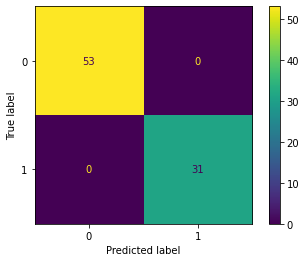

In [37]:
cm = confusion_matrix(Y_test, Y_pred_LR, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot()

In [36]:
print('Accuracy: ', accuracy_score(Y_test, Y_pred_LR))
print('Precision: ', precision_score(Y_test, Y_pred_LR))
print('Recall: ', recall_score(Y_test, Y_pred_LR))
print('F1 Score: ', f1_score(Y_test, Y_pred_LR))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
